In [13]:
import pandas as pd
from scipy.spatial import cKDTree
import numpy as np

In [ ]:
# Einlesen der Daten
didok = pd.read_csv("Data/didok.csv", sep=";")
wege_freizeit_erweitert = pd.read_csv(
    "generated_data/wege_freizeit_erweitert.csv", sep=";"
)
etappen_freizeit_erweitert = pd.read_csv(
    "generated_data/etappen_freizeit_erweitert.csv", sep=";"
)

In [5]:
didok.head()

,lod,Geoposition,﻿numberShort,uicCountryCode,sloid,number,validFrom,validTo,designationOfficial,designationLong,...,businessOrganisation,businessOrganisationNumber,businessOrganisationAbbreviationDe,businessOrganisationAbbreviationFr,businessOrganisationDescriptionDe,businessOrganisationDescriptionFr,fotComment,height,creationDate,editionDate
0,http://lod.opentransportdata.swiss/didok/bpuic,"49.57723600979744, 10.588775009219152",10507,11,ch:1:sloid:1110507,1110507,2022-12-11,2099-12-31,"Neustadt (Aisch), Bahnhof",NaN,...,ch:1:sboid:101257,9988,INFOPLUS,INFOPLUS,Fiktive GO für Infoplus,Fiktive GO für Infoplus,NaN,0.0,2023-04-25T22:59:46+02:00,2023-10-11T16:56:52+02:00
1,http://lod.opentransportdata.swiss/didok/bpuic,"52.281669008914854, 10.576396007454766",10577,11,ch:1:sloid:1110577,1110577,2022-12-11,2099-12-31,"Braunschweig, Petzvalstrasse",NaN,...,ch:1:sboid:101257,9988,INFOPLUS,INFOPLUS,Fiktive GO für Infoplus,Fiktive GO für Infoplus,NaN,0.0,2023-06-06T10:32:35+02:00,2023-10-11T16:56:52+02:00
2,http://lod.opentransportdata.swiss/didok/bpuic,"50.37017301038644, 8.468945007169054",10563,11,ch:1:sloid:1110563,1110563,2022-12-11,2099-12-31,"Hundstadt, Ortsmitte",NaN,...,ch:1:sboid:101257,9988,INFOPLUS,INFOPLUS,Fiktive GO für Infoplus,Fiktive GO für Infoplus,NaN,0.0,2023-06-01T17:06:35+02:00,2023-10-11T16:56:52+02:00
3,http://lod.opentransportdata.swiss/didok/bpuic,"48.71780001021133, 9.402911008637096",10564,11,ch:1:sloid:1110564,1110564,2022-12-11,2099-12-31,"Plochingen, Werk",NaN,...,ch:1:sboid:101257,9988,INFOPLUS,INFOPLUS,Fiktive GO für Infoplus,Fiktive GO für Infoplus,NaN,0.0,2023-06-01T17:09:30+02:00,2023-10-11T16:56:52+02:00
4,http://lod.opentransportdata.swiss/didok/bpuic,"48.20742701066016, 7.683645007305404",10581,11,ch:1:sloid:1110581,1110581,2023-06-06,2099-12-31,"Weisweil (Brsg), Mühlenstrasse",NaN,...,ch:1:sboid:101257,9988,INFOPLUS,INFOPLUS,Fiktive GO für Infoplus,Fiktive GO für Infoplus,NaN,0.0,2023-06-06T10:36:16+02:00,2023-10-11T16:56:52+02:00


In [6]:
wege_freizeit_erweitert.head()

,HHNR,Wegnummer,Start_X-Koordinate,Start_Y-Koordinate,Ziel_X-Koordinate,Ziel_Y-Koordinate,Freizeitaktivität,Dauer in Minuten,Wegzweck,Alter,...,Wohnort X-Koordinate,Wohnort Y-Koordinate,W_ORT,Wohnort: PLZ,Wohnort: Kanton,Führerausweis_PW,Führerausweis_Motorrad,Distanz_km,Emissionen,Verkehrsmittel
0,110001,4,6.559870,46.549366,6.552598,46.568205,Gastronomiebesuch,10,8.0,41-60,...,6.559870,46.549366,Bussigny,1030,Vaud,True,True,3.973,607.933969,Auto
1,110001,6,6.554009,46.540095,6.554009,46.540095,Einkaufsbummel / Shopping,5,8.0,41-60,...,6.559870,46.549366,Bussigny,1030,Vaud,True,True,0.404,61.818606,Auto
2,110008,1,6.635652,46.785591,6.635652,46.785591,Nicht-sportliche Aussenaktivität,120,8.0,41-60,...,6.635652,46.785591,Yverdon-les-Bains,1400,Vaud,True,True,5.778,0.000000,Zu Fuss
3,110008,4,6.635652,46.785591,6.635652,46.785591,Aktiver Sport,120,8.0,41-60,...,6.635652,46.785591,Yverdon-les-Bains,1400,Vaud,True,True,3.262,0.000000,Zu Fuss
4,110011,1,9.112485,47.451677,9.112485,47.451677,Nicht-sportliche Aussenaktivität,75,8.0,11-18,...,9.112485,47.451677,Henau,9247,St. Gallen,False,False,0.556,0.000000,Zu Fuss


In [18]:
etappen_freizeit_erweitert.head()

,HHNR,Etappennummer,Wegnummer,Verkehrsmittel,Distanz_km,Start_X,Start_Y,Ziel_X,Ziel_Y,gwp_pro_Kilometer_[g],...,Familienstand,Erwerbsstatus,Tägliche Freizeitwege,Wohnort X-Koordinate,Wohnort Y-Koordinate,W_ORT,Wohnort: PLZ,Wohnort: Kanton,Führerausweis_PW,Führerausweis_Motorrad
0,110001,4,4,Auto,3.973,6.559870,46.549366,6.552598,46.568205,153.016353,...,single,Mitarbeiter(in),3,6.559870,46.549366,Bussigny,1030,Vaud,True,True
1,110001,6,6,Auto,0.404,6.554009,46.540095,6.554009,46.540095,153.016353,...,single,Mitarbeiter(in),3,6.559870,46.549366,Bussigny,1030,Vaud,True,True
2,110008,1,1,Zu Fuss,5.778,6.635652,46.785591,6.635652,46.785591,0.000000,...,vergeben,Lernende(r),2,6.635652,46.785591,Yverdon-les-Bains,1400,Vaud,True,True
3,110008,4,4,Zu Fuss,3.262,6.635652,46.785591,6.635652,46.785591,0.000000,...,vergeben,Lernende(r),2,6.635652,46.785591,Yverdon-les-Bains,1400,Vaud,True,True
4,110011,1,1,Zu Fuss,0.556,9.112485,47.451677,9.112485,47.451677,0.000000,...,single,Mitarbeiter(in),1,9.112485,47.451677,Henau,9247,St. Gallen,False,False


In [ ]:
# didok DataFrame vorbereiten
didok = didok.dropna(subset=["Geoposition"])
didok["Latitude"], didok["Longitude"] = zip(
    *didok["Geoposition"].str.split(",").apply(lambda x: (float(x[0]), float(x[1])))
)

In [ ]:
# Haversine-Distanz (in Kilometern)
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius der Erde in Kilometern
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c  # Ergebnis in Kilometern

In [ ]:
# Koordinaten aus 'didok'
didok_coords = np.radians(didok[["Latitude", "Longitude"]].values)

# Tree erstellen
tree = cKDTree(didok_coords)

# Koordinaten aus 'wege_freizeit_erweitert'
wege_coords_start = np.radians(
    wege_freizeit_erweitert[["Start_Y-Koordinate", "Start_X-Koordinate"]].values
)
wege_coords_ziel = np.radians(
    wege_freizeit_erweitert[["Ziel_Y-Koordinate", "Ziel_X-Koordinate"]].values
)

# Nächste Nachbarn finden (Index und Distanz in Radiant)
distances_start, indices = tree.query(wege_coords_start, k=1)
distances_ziel, indices = tree.query(wege_coords_ziel, k=1)

# Distanz in Kilometer umrechnen
distances_km_start = distances_start * 6371  # Erdradius in Kilometern
distances_km_ziel = distances_ziel * 6371  # Erdradius in Kilometern

# Ergebnis hinzufügen
wege_freizeit_erweitert["Distanz_zur_Haltestelle_km_Start"] = distances_km_start
wege_freizeit_erweitert["Distanz_zur_Haltestelle_km_Ziel"] = distances_km_ziel

In [16]:
wege_freizeit_erweitert

,HHNR,Wegnummer,Start_X-Koordinate,Start_Y-Koordinate,Ziel_X-Koordinate,Ziel_Y-Koordinate,Freizeitaktivität,Dauer in Minuten,Wegzweck,Alter,...,W_ORT,Wohnort: PLZ,Wohnort: Kanton,Führerausweis_PW,Führerausweis_Motorrad,Distanz_km,Emissionen,Verkehrsmittel,Distanz_zur_Haltestelle_km_Start,Distanz_zur_Haltestelle_km_Ziel
0,110001,4,6.559870,46.549366,6.552598,46.568205,Gastronomiebesuch,10,8.0,41-60,...,Bussigny,1030,Vaud,True,True,3.973,607.933969,Auto,0.327631,0.320073
1,110001,6,6.554009,46.540095,6.554009,46.540095,Einkaufsbummel / Shopping,5,8.0,41-60,...,Bussigny,1030,Vaud,True,True,0.404,61.818606,Auto,0.188274,0.188274
2,110008,1,6.635652,46.785591,6.635652,46.785591,Nicht-sportliche Aussenaktivität,120,8.0,41-60,...,Yverdon-les-Bains,1400,Vaud,True,True,5.778,0.000000,Zu Fuss,0.162703,0.162703
3,110008,4,6.635652,46.785591,6.635652,46.785591,Aktiver Sport,120,8.0,41-60,...,Yverdon-les-Bains,1400,Vaud,True,True,3.262,0.000000,Zu Fuss,0.162703,0.162703
4,110011,1,9.112485,47.451677,9.112485,47.451677,Nicht-sportliche Aussenaktivität,75,8.0,11-18,...,Henau,9247,St. Gallen,False,False,0.556,0.000000,Zu Fuss,0.219447,0.219447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23663,459965,1,4.846710,45.748460,4.846710,45.748460,Besuche,20,8.0,26-40,...,Bevaix,2022,Neuchâtel,True,False,6.960,1252.340011,Auto,64.800684,64.800684
23664,459971,1,7.294728,46.183483,7.294728,46.183483,Wanderung,360,8.0,26-40,...,Morges,1110,Vaud,True,False,14.000,0.000000,Zu Fuss,0.041724,0.041724
23665,459976,3,7.577385,47.560109,7.573720,47.554275,Gastronomiebesuch,15,8.0,26-40,...,Schaffhausen,8207,Schaffhausen,True,False,1.852,460.504812,Auto,0.022046,0.276308
23666,459981,2,9.025833,46.193579,9.026348,46.193224,Medizin/Wellness/Fitness,1,8.0,41-60,...,Capolago,6825,Ticino,True,True,0.067,0.000000,Zu Fuss,0.098310,0.166477


Feststellung: Bei Wegen ist der Start- und Zielort oft identisch. Es ist sinnvoller, die Etappen anzuschauen.

In [ ]:
# Koordinaten aus 'etappen_freizeit_erweitert'
etappen_coords_start = np.radians(
    etappen_freizeit_erweitert[["Start_Y", "Start_X"]].values
)
etappen_coords_ziel = np.radians(
    etappen_freizeit_erweitert[["Ziel_Y", "Ziel_X"]].values
)

# Nächste Nachbarn finden (Index und Distanz in Radiant)
distances_start, indices = tree.query(etappen_coords_start, k=1)
distances_ziel, indices = tree.query(etappen_coords_ziel, k=1)

# Distanz in Kilometer umrechnen
distances_km_start = distances_start * 6371  # Erdradius in Kilometern
distances_km_ziel = distances_ziel * 6371  # Erdradius in Kilometern

# Ergebnis hinzufügen
etappen_freizeit_erweitert["Distanz_zur_Haltestelle_km_Start"] = distances_km_start
etappen_freizeit_erweitert["Distanz_zur_Haltestelle_km_Ziel"] = distances_km_ziel

In [20]:
etappen_freizeit_erweitert

,HHNR,Etappennummer,Wegnummer,Verkehrsmittel,Distanz_km,Start_X,Start_Y,Ziel_X,Ziel_Y,gwp_pro_Kilometer_[g],...,Tägliche Freizeitwege,Wohnort X-Koordinate,Wohnort Y-Koordinate,W_ORT,Wohnort: PLZ,Wohnort: Kanton,Führerausweis_PW,Führerausweis_Motorrad,Distanz_zur_Haltestelle_km_Start,Distanz_zur_Haltestelle_km_Ziel
0,110001,4,4,Auto,3.973,6.559870,46.549366,6.552598,46.568205,153.016353,...,3,6.559870,46.549366,Bussigny,1030,Vaud,True,True,0.327631,0.320073
1,110001,6,6,Auto,0.404,6.554009,46.540095,6.554009,46.540095,153.016353,...,3,6.559870,46.549366,Bussigny,1030,Vaud,True,True,0.188274,0.188274
2,110008,1,1,Zu Fuss,5.778,6.635652,46.785591,6.635652,46.785591,0.000000,...,2,6.635652,46.785591,Yverdon-les-Bains,1400,Vaud,True,True,0.162703,0.162703
3,110008,4,4,Zu Fuss,3.262,6.635652,46.785591,6.635652,46.785591,0.000000,...,2,6.635652,46.785591,Yverdon-les-Bains,1400,Vaud,True,True,0.162703,0.162703
4,110011,1,1,Zu Fuss,0.556,9.112485,47.451677,9.112485,47.451677,0.000000,...,1,9.112485,47.451677,Henau,9247,St. Gallen,False,False,0.219447,0.219447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37774,459971,1,1,Zu Fuss,14.000,7.294728,46.183483,7.294728,46.183483,0.000000,...,1,6.487331,46.515562,Morges,1110,Vaud,True,False,0.041724,0.041724
37775,459976,5,3,Auto,1.852,7.577385,47.560109,7.573720,47.554275,248.652706,...,1,8.657034,47.721191,Schaffhausen,8207,Schaffhausen,True,False,0.022046,0.276308
37776,459981,4,2,Zu Fuss,0.067,9.025833,46.193579,9.026348,46.193224,0.000000,...,3,8.980385,45.904131,Capolago,6825,Ticino,True,True,0.098310,0.166477
37777,459981,11,7,Auto,22.238,8.980385,45.904131,8.967822,46.027943,153.016353,...,3,8.980385,45.904131,Capolago,6825,Ticino,True,True,0.115728,0.077634


In [ ]:
# Prüfen, ob ÖV-Potenzial besteht
etappen_freizeit_erweitert["öv_potenzial"] = (
    (etappen_freizeit_erweitert["Verkehrsmittel"] == "Auto")
    & (etappen_freizeit_erweitert["Distanz_zur_Haltestelle_km_Start"] <= 0.2)
    & (etappen_freizeit_erweitert["Distanz_zur_Haltestelle_km_Ziel"] <= 0.2)
)

# Neue Spalte mit den neuen Emissionen
etappen_freizeit_erweitert["neue_emissionen"] = etappen_freizeit_erweitert.apply(
    lambda row: (
        row["Distanz_km"] * 25.4 if row["öv_potenzial"] else row["Emissionen"]
    ),  # Emissionen 25,4g CO2 pro km gemäss Umweltrechner Verkehr
    axis=1,
)

In [42]:
summe_alt = etappen_freizeit_erweitert["Emissionen"].sum()
summe_neu = etappen_freizeit_erweitert["neue_emissionen"].sum()
einsparung = summe_alt - summe_neu

print("Emissionen vorher: ", summe_alt)
print("Emissionen nachher: ", summe_neu)
print("Einsparung: ", einsparung)

Emissionen vorher:  47579842.58418407
Emissionen nachher:  35991709.49337245
Einsparung:  11588133.090811625


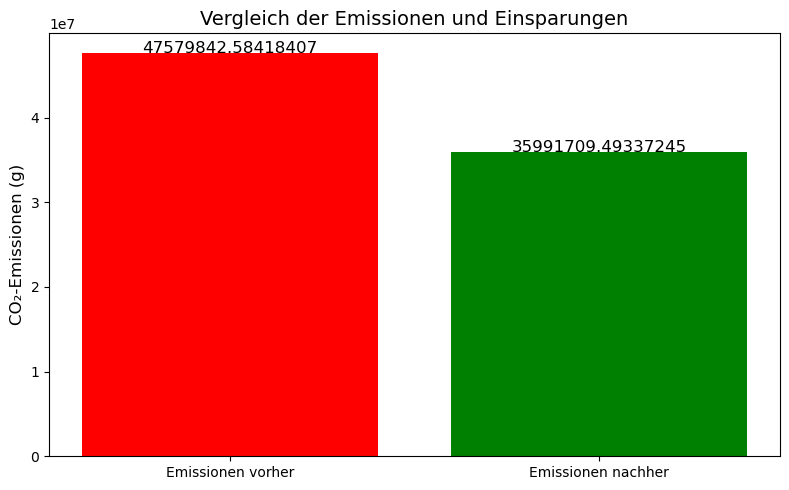

In [43]:
import matplotlib.pyplot as plt

# Daten für das Diagramm
labels = ["Emissionen vorher", "Emissionen nachher"]
values = [summe_alt, summe_neu]
colors = ["red", "green", "blue"]

# Balkendiagramm erstellen
plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=colors)
plt.ylabel("CO₂-Emissionen (g)", fontsize=12)
plt.title("Vergleich der Emissionen und Einsparungen", fontsize=14)

# Werte anzeigen
for i, value in enumerate(values):
    plt.text(i, value + 200, f"{value}", ha="center", fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
# Gruppierung nach HHNR, Wegnummer und Wohnort: Kanton
grouped = (
    etappen_freizeit_erweitert.groupby(["HHNR", "Wegnummer", "Wohnort: Kanton"])
    .sum(numeric_only=True)
    .reset_index()
)

# Durchschnittliche Emissionen pro Kanton berechnen
avg_emissions_per_canton = (
    grouped.groupby("Wohnort: Kanton")[["Emissionen", "neue_emissionen"]]
    .mean()
    .reset_index()
)

# Berechnung der Einsparung in % je Kanton
avg_emissions_per_canton["Einsparung (%)"] = (
    (
        avg_emissions_per_canton["Emissionen"]
        - avg_emissions_per_canton["neue_emissionen"]
    )
    / avg_emissions_per_canton["Emissionen"]
    * 100
)

print("Durchschnittliche Emissionen und Einsparungen pro Kanton:")
print(avg_emissions_per_canton)

Durchschnittliche Emissionen und Einsparungen pro Kanton:
           Wohnort: Kanton   Emissionen  neue_emissionen  Einsparung (%)
0                   Aargau  1316.521264       992.539068       24.608960
1   Appenzell Ausserrhoden  1810.122300      1548.490990       14.453792
2    Appenzell Innerrhoden   702.588243       566.085764       19.428517
3               Basel-Land  1072.522362       878.037841       18.133377
4              Basel-Stadt   562.497657       379.846506       32.471451
5                     Bern  1315.543582      1018.156331       22.605656
6                 Fribourg  1597.358846      1182.233150       25.988255
7                   Genève   839.588849       620.578036       26.085484
8                   Glarus   840.647704       636.075441       24.335077
9               Graubünden  1372.936168      1004.053743       26.868141
10                    Jura  1519.460891      1152.388825       24.158046
11                  Luzern  1356.329532      1055.975926       22.

In [46]:
# Merge mit wege_freizeit_erweitert auf HHNR und Wegnummer (nur neue_emissionen)
wege_freizeit_erweitert = wege_freizeit_erweitert.merge(
    etappen_freizeit_erweitert[["HHNR", "Wegnummer", "neue_emissionen"]],
    on=["HHNR", "Wegnummer"],
)

In [ ]:
# Durchschnitt je Freizeitaktivität berechnen
avg_emissions_per_activity = wege_freizeit_erweitert.groupby(
    "Freizeitaktivität", as_index=False
).agg({"Emissionen": "mean", "neue_emissionen": "mean"})

# Einsparung in % berechnen
avg_emissions_per_activity["Einsparung (%)"] = (
    (
        avg_emissions_per_activity["Emissionen"]
        - avg_emissions_per_activity["neue_emissionen"]
    )
    / avg_emissions_per_activity["Emissionen"]
    * 100
)

avg_emissions_per_activity

,Freizeitaktivität,Emissionen,neue_emissionen,Einsparung (%)
0,Aktiver Sport,1212.344045,908.227119,25.085035
1,"Ausflug, Ferien",11473.950464,9589.051825,16.427634
2,Besuche,2689.694265,1954.113517,27.348117
3,Einkaufsbummel / Shopping,2152.301529,1246.800955,42.071269
4,Essen ohne Gastronomiebesuch,1616.570679,1462.615941,9.523539
5,Gastronomiebesuch,1412.515825,981.285081,30.529268
6,Häusliche Freizeitaktivitäten auswärts,883.241206,629.961443,28.676171
7,"Kulturveranstaltungen, Freizeitanlagen",1871.755016,1214.829213,35.096783
8,Medizin/Wellness/Fitness,1689.334986,1014.008387,39.975884
9,Nicht-sportliche Aussenaktivität,391.625319,256.339411,34.544730
